In [42]:
import matplotlib.pylab as plt
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import numpy as np
import glob
file_list = glob.glob("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/*.npz")
print(file_list)
f = np.load(file_list[0], allow_pickle=True)
evts = f["dir_events"][()]
print("keys:\t", evts.keys())
for name_file in file_list[1:]:
    f = np.load(name_file, allow_pickle=True)
    for key in evts.keys():
        evts[key].extend(f["dir_events"][()][key])

['/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_47.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_93.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_387.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_397.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_395.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_29.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_115.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_9.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_281.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_100.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_415.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_126.npz', '/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_withpdgdep/predict_184.npz', '/afs/ihep.ac.cn/users/l/luox

[[-10012.39944508  -8414.99211474  -9464.28039726]
 [ -4293.65155844 -14083.61699016  -9613.79541446]
 [  9473.67027448  -1230.16100739   7473.35655433]
 ...
 [  9729.95341603  -3542.4621379  -13857.67668873]
 [  1533.64954972   -767.36079474   4054.59578454]
 [   970.3648351    4460.0000031    6566.30992301]]


Text(0.5, 1.0, 'Neutron Samples Before Selection ')

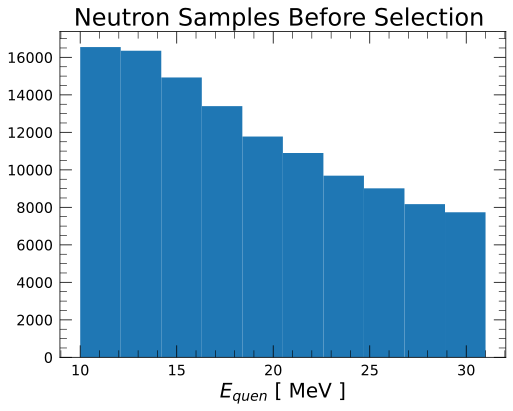

In [59]:
uplimit_equen = 31
downlimit_equen = 10
evts["vertex"] = np.array(evts["vertex"])
evts["equen"] = np.array(evts["equen"])
evts["PSD"] = np.array(evts["PSD"])
index_cut_equen = (evts["equen"]<uplimit_equen) & (evts["equen"]>downlimit_equen)
v_R = np.sqrt(np.sum(evts["vertex"]**2, axis=1 ))/1000
index_cut_vertex = v_R**3<4096
# plt.hist(v_R[index_cut_vertex]**3)
index_cut = index_cut_equen & index_cut_vertex
plt.hist(evts["equen"][index_cut])
plt.xlabel("$E_{quen}$ [ MeV ]")
plt.title("Neutron Samples Before Selection ")

Text(0.5, 1.0, 'FastN Spectrum After Cut')

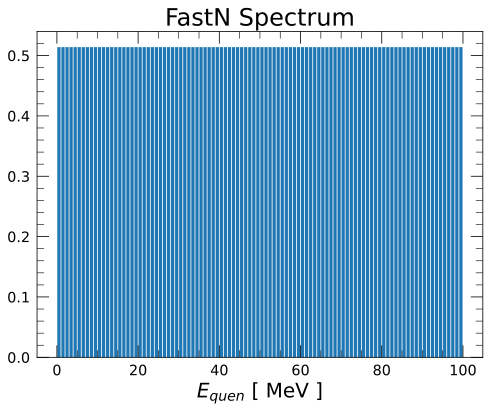

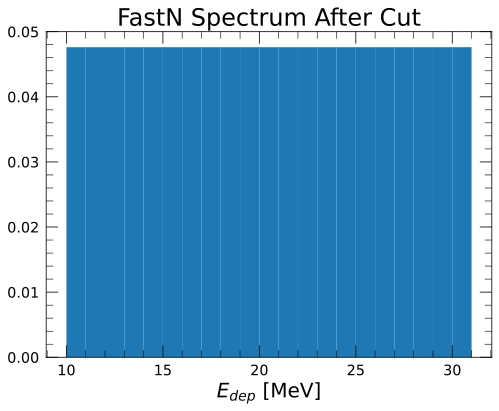

In [33]:
import uproot as up
f_spectrum = up.open("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/energy_spectrum/zhangyy/h_FastN.root")
h_spe, edge_spe = f_spectrum["FastN"].to_numpy()
center_spe = (edge_spe[1:]+edge_spe[:-1])/2
plt.bar(center_spe, h_spe)
plt.xlabel("$E_{quen}$ [ MeV ]")
plt.title("FastN Spectrum")

# Cut the energy spectrum
index_cut_spe = (center_spe>downlimit_equen) & (center_spe<uplimit_equen)
h_spe_cut = h_spe[index_cut_spe]/np.sum(h_spe[index_cut_spe])
center_spe_cut = center_spe[index_cut_spe]
bin_width_spe_cut = np.diff(edge_spe)[index_cut_spe]
plt.figure()
plt.bar(center_spe_cut, h_spe_cut, align="center", width=bin_width_spe_cut)
plt.xlabel("$E_{dep} $ [MeV]")
plt.title("FastN Spectrum After Cut")


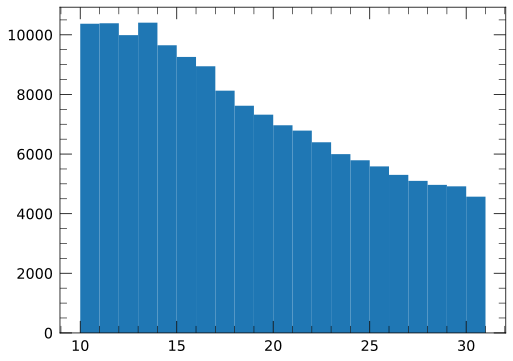

In [75]:
import random
edge_spe_cut = edge_spe[(edge_spe<=uplimit_equen)&(edge_spe>=downlimit_equen)]
h_raw_plt = plt.hist(evts["equen"], bins=edge_spe_cut)
h_raw_spe = h_raw_plt[0]

bkg_samples = {"equen":np.array([]), "prod":np.array([]), "vertex":np.array([[0, 0, 0]])}
v_reweight_ratio = [h_spe_cut[i]/h_raw_spe[i] if h_raw_spe[i]!=0 else 0 for i in range(len(h_raw_spe))]
scale_factor_evts = np.max(v_reweight_ratio) #because sometimes the pdf of bkg is greater than pdf. of bkg_samples
                                                    #which will cause the number of selected events is out of range of existing samples.
for i in range(len(bin_width_spe_cut)):
    index_DSNB_Ecut = (evts["equen"][index_cut]<center_spe_cut[i]+bin_width_spe_cut[i]*0.5) &\
                      (evts["equen"][index_cut]>center_spe_cut[i]-bin_width_spe_cut[i]*0.5)
    equen_DSNB_Ecut = evts["equen"][index_cut][index_DSNB_Ecut]
    prod_DSNB_Ecut = evts["PSD"][index_cut][index_DSNB_Ecut]
    vertex_DSNB_Ecut = evts["vertex"][index_cut][index_DSNB_Ecut]
    #### Check result #######
    # print(h_DSNB)
    # print(h_spe_cut)
    # print((center_DSNB))
    # print(center_spe_cut)
    # print(len(equen_DSNB_Ecut))
    ##########################
    n_evts_need_selected_DSNB = round(len(equen_DSNB_Ecut)*v_reweight_ratio[i]/scale_factor_evts)
    # print(len(equen_DSNB_Ecut), n_evts_need_selected_DSNB)
    index_select_DSNB = random.sample(range(0, len(equen_DSNB_Ecut)), n_evts_need_selected_DSNB)
    bkg_samples["equen"] = np.concatenate((bkg_samples["equen"], equen_DSNB_Ecut[index_select_DSNB]))
    bkg_samples["prod"]  = np.concatenate((bkg_samples["prod"], prod_DSNB_Ecut[index_select_DSNB] ))
    bkg_samples["vertex"] = np.concatenate((bkg_samples["vertex"], vertex_DSNB_Ecut[index_select_DSNB]))
bkg_samples["vertex"] = bkg_samples["vertex"][1:] #in order to concatenate the array from 2d array, we initialize
                                                #the first index as [0, 0, 0], so after concatenating we need to
                                                #remove it

Check Samples :
PSD:	 73785
vertex:	 73785
euqen:	 73785


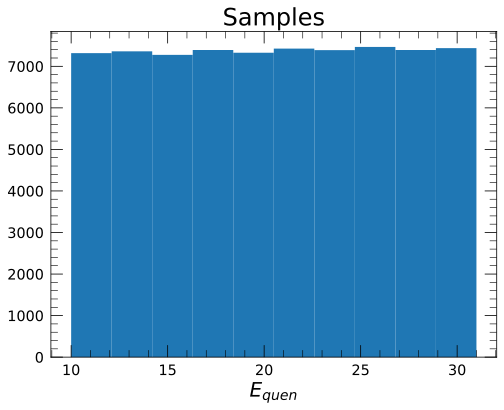

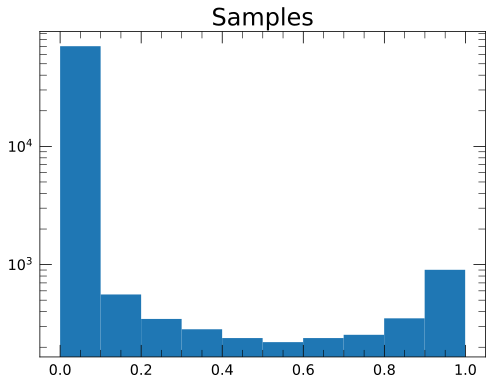

In [78]:
plt.figure()
plt.hist(bkg_samples["equen"])
plt.title("Samples")
plt.xlabel("$E_{quen}$")
plt.figure()
plt.hist(bkg_samples["prod"])
plt.title("Samples")
plt.semilogy()
print("Check Samples :")
print("PSD:\t", len(bkg_samples["prod"]))
print("vertex:\t",len(bkg_samples["vertex"]))
print("euqen:\t", len(bkg_samples["equen"]))

In [80]:
np.savez("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_time_jobs_DSNB_sk_data/FastN_samples_predict_0.npz",
         dict_samples=bkg_samples)

In [81]:
test_load = True
if test_load:
    f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_time_jobs_DSNB_sk_data/FastN_samples_predict_0.npz",
            allow_pickle=True)
    print(f["dict_samples"])


{'equen': array([10.60299494, 10.70153331, 10.87091136, ..., 30.91954901,
       30.44996298, 30.84088626]), 'prod': array([9.17873704e-10, 2.03893558e-06, 1.45038891e-02, ...,
       3.84743147e-06, 4.82927423e-07, 1.17871468e-09]), 'vertex': array([[ -3338.58933484,   4983.15340275,   9456.35459985],
       [  6228.1152432 ,  -6596.3196855 ,  -7597.6916114 ],
       [ -3551.19514482, -12992.22160878,   8303.65445002],
       ...,
       [ -5276.14452351,  -2181.38051128,  -6398.72193302],
       [  3236.13556417,   2844.18081923,   8692.85087355],
       [ 12129.1664951 ,  -1022.84541081,  -7822.29733248]])}
